In [297]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [298]:
data_lift_the_coke_can = {
    "conditions": {
        "no_help": [
            {"success": 1, "steps": 15, "num_queries": None},
            {"success": 1, "steps": 13, "num_queries": None},
            {"success": 0, "steps": 40, "num_queries": None},
            {"success": 0, "steps": 40, "num_queries": None},
            {"success": 0, "steps": 40, "num_queries": None},
            {"success": 0, "steps": 40, "num_queries": None},
            {"success": 1, "steps": 24, "num_queries": None},
            {"success": 1, "steps": 9, "num_queries": None},
            {"success": 0, "steps": 40, "num_queries": None},
            {"success": 0, "steps": 40, "num_queries": None}
        ],
        "simple_individual": [
            {"success": 1, "steps": 15, "num_queries": 1},
            {"success": 1, "steps": 13, "num_queries": 1},
            {"success": 1, "steps": 30, "num_queries": 7},
            {"success": 1, "steps": 24, "num_queries": 9},
            {"success": 0, "steps": 40, "num_queries": 16},
            {"success": 0, "steps": 40, "num_queries": 20},
            {"success": 1, "steps": 11, "num_queries": 0},
            {"success": 1, "steps": 10, "num_queries": 2},
            {"success": 1, "steps": 27, "num_queries": 5},
            {"success": 0, "steps": 40, "num_queries": 9}
        ],
        "semantic_individual": [
            {"success": 1, "steps": 9, "num_queries": 3},
            {"success": 1, "steps": 10, "num_queries": 2},
            {"success": 1, "steps": 28, "num_queries": 18},
            {"success": 1, "steps": 37, "num_queries": 21},
            {"success": 0, "steps": 40, "num_queries": 27},
            {"success": 0, "steps": 40, "num_queries": 22},
            {"success": 0, "steps": 9, "num_queries": 3},
            {"success": 1, "steps": 8, "num_queries": 1},
            {"success": 1, "steps": 27, "num_queries": 12},
            {"success": 0, "steps": 19, "num_queries": 7}
        ],
        "simple_3d": [
            {"success": 1, "steps": 12, "num_queries": 0},
            {"success": 1, "steps": 17, "num_queries": 1},
            {"success": 1, "steps": 32, "num_queries": 7},
            {"success": 0, "steps": 40, "num_queries": 11},
            {"success": 0, "steps": 40, "num_queries": 13},
            {"success": 0, "steps": 40, "num_queries": 13},
            {"success": 1, "steps": 13, "num_queries": 0},
            {"success": 1, "steps": 24, "num_queries": 0},
            {"success": 1, "steps": 32, "num_queries": 5},
            {"success": 0, "steps": 40, "num_queries": 9}
        ],
        "semantic_3d": [
            {"success": 1, "steps": 9, "num_queries": 7},
            {"success": 1, "steps": 9, "num_queries": 9},
            {"success": 1, "steps": 20, "num_queries": 17},
            {"success": 1, "steps": 18, "num_queries": 16},
            {"success": 0, "steps": 40, "num_queries": 34},
            {"success": 0, "steps": 40, "num_queries": 37},
            {"success": 1, "steps": 9, "num_queries": 9},
            {"success": 1, "steps": 8, "num_queries": 6},
            {"success": 1, "steps": 22, "num_queries": 17},
            {"success": 1, "steps": 21, "num_queries": 20}
        ]
    }
}

data_lift_the_bottle = {
    "conditions": {
        "no_help": [
            {"success": 0, "steps": 40, "num_queries": None},
            {"success": 0, "steps": 40, "num_queries": None},
            {"success": 0, "steps": 40, "num_queries": None},
            {"success": 0, "steps": 40, "num_queries": None},
            {"success": 0, "steps": 40, "num_queries": None},
            {"success": 0, "steps": 40, "num_queries": None},
            {"success": 0, "steps": 40, "num_queries": None},
            {"success": 0, "steps": 40, "num_queries": None},
            {"success": 0, "steps": 40, "num_queries": None},
            {"success": 1, "steps": 27, "num_queries": None}
        ],
        "simple_individual": [
            {"success": 0, "steps": 40, "num_queries": 16},
            {"success": 0, "steps": 40, "num_queries": 15},
            {"success": 0, "steps": 40, "num_queries": 0},
            {"success": 0, "steps": 40, "num_queries": 0},
            {"success": 1, "steps": 14, "num_queries": 1},
            {"success": 1, "steps": 38, "num_queries": 1},
            {"success": 0, "steps": 40, "num_queries": 17},
            {"success": 0, "steps": 40, "num_queries": 18},
            {"success": 1, "steps": 9, "num_queries": 0},
            {"success": 1, "steps": 6, "num_queries": 0}
        ],
        "semantic_individual": [
            {"success": 0, "steps": 40, "num_queries": 19},
            {"success": 1, "steps": 29, "num_queries": 7},
            {"success": 0, "steps": 40, "num_queries": 10},
            {"success": 0, "steps": 40, "num_queries": 0},
            {"success": 0, "steps": 40, "num_queries": 0},
            {"success": 0, "steps": 40, "num_queries": 0},
            {"success": 0, "steps": 40, "num_queries": 13},
            {"success": 0, "steps": 40, "num_queries": 10},
            {"success": 1, "steps": 9, "num_queries": 1},
            {"success": 1, "steps": 13, "num_queries": 0}
        ]
    }
}

In [299]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def process_condition_data(data):
    successes = [entry for entry in data if entry["success"] == 1]
    failures = [entry for entry in data if entry["success"] == 0]
    
    success_steps = [s["steps"] for s in successes]
    failure_steps = [f["steps"] for f in failures]
    
    success_queries = [s["num_queries"] for s in successes if s["num_queries"] is not None]
    failure_queries = [f["num_queries"] for f in failures if f["num_queries"] is not None]
    
    total = len(successes) + len(failures)
    success_pct = len(successes) / total * 100
    failure_pct = len(failures) / total * 100
    
    success_se = np.sqrt((success_pct * (100 - success_pct)) / total)
    failure_se = np.sqrt((failure_pct * (100 - failure_pct)) / total)
    
    return {
        'success_pct': success_pct,
        'failure_pct': failure_pct,
        'success_se': success_se,
        'failure_se': failure_se,
        'success_steps': success_steps,
        'failure_steps': failure_steps,
        'success_queries': success_queries,
        'failure_queries': failure_queries
    }

def plot_success_failure_percentages(coke_data, bottle_data, title="Success vs Failures by Approach"):
    plt.style.use('default')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 3), sharey=True)
    
    colors = ['#ff7f0e', '#2ca02c', '#1f77b4', '#d62728', '#9467bd']
    
    for idx, (ax, data, task_name) in enumerate([(ax1, coke_data, "Coke Can"), (ax2, bottle_data, "Bottle")]):
        conditions = list(data["conditions"].keys())
        n_conditions = len(conditions)
        
        processed_data = {cond: process_condition_data(data["conditions"][cond]) 
                         for cond in conditions}
        
        x = np.arange(1)  # Only one bar per condition now
        width = 0.15
        
        for i, (condition, cond_data) in enumerate(processed_data.items()):
            offset = (i - (n_conditions-1)/2) * width
            ax.bar(x + offset, 
                  [cond_data['success_pct']],  # Only plotting success percentage
                  width,
                  yerr=[cond_data['success_se']],  # Only success standard error
                  label=condition.replace('_', ' ').title(),
                  color=colors[i],
                  alpha=.7,
                  capsize=3,
                  error_kw={'elinewidth': 1, 'capthick': 1})
        
        ax.set_xticks(x)
        ax.set_xticklabels(['Success Rate'])
        ax.set_title(f"{task_name} Task")
        ax.grid(True, linestyle='--', alpha=0.7, axis='y')
        ax.set_axisbelow(True)
        
        if idx == 0:
            ax.legend(loc='upper right', fontsize=5)
        
        # Set y-axis limits explicitly
        ax.set_ylim(0, 100)
        # Add horizontal lines at specific y-values
        ax.yaxis.set_major_locator(plt.MultipleLocator(25))
    
    handles, labels = ax1.get_legend_handles_labels()
    fig.supylabel('Percentage (%)')
    plt.subplots_adjust(wspace=0.1)  # Reduce space between subplots
    plt.savefig('success_failure_percentages.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_success_queries_comparison(coke_data, bottle_data, title="Success Steps Comparison"):
    plt.style.use('default')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 3), sharey=True)
    
    # Define condition-specific color pairs (success, failure)
    condition_colors = {
        'simple_individual': ('#ff7f0e', '#ffbb78'),  # Orange, Light Orange
        'semantic_individual': ('#2ca02c', '#98df8a'),  # Green, Light Green
        'simple_3d': ('#1f77b4', '#aec7e8'),  # Blue, Light Blue
        'semantic_3d': ('#d62728', '#ff9896')  # Red, Light Red
    }
    
    # For legend
    from matplotlib.patches import Patch
    
    for idx, (ax, data, task_name) in enumerate([(ax1, coke_data, "Coke Can"), (ax2, bottle_data, "Bottle")]):
        # Filter out 'no_help' condition
        conditions = [cond for cond in data["conditions"].keys() if cond != "no_help"]
        processed_data = {cond: process_condition_data(data["conditions"][cond]) 
                         for cond in conditions}
        
        all_queries = []
        labels = []
        colors = []
        legend_elements = []
        
        for condition in conditions:
            success_color, failure_color = condition_colors[condition]
            
            # Add success queries
            all_queries.append(processed_data[condition]['success_queries'])
            labels.append(f"{condition.replace('_', ' ').title()} (S)")
            colors.append(success_color)
            
            # Add failure queries
            all_queries.append(processed_data[condition]['failure_queries'])
            labels.append(f"{condition.replace('_', ' ').title()} (F)")
            colors.append(failure_color)
            
            # Add both success and failure to legend
            legend_elements.extend([
                Patch(facecolor=success_color, alpha=0.7,
                     label=f"{condition.replace('_', ' ').title()} (S)"),
                Patch(facecolor=failure_color, alpha=0.7,
                     label=f"{condition.replace('_', ' ').title()} (F)")
            ])
        
        bp = ax.boxplot(all_queries,
                       labels=labels,
                       patch_artist=True,
                       medianprops={'color': 'black'},
                       flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markersize': 4})
        
        # Color the boxes
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        ax.set_title(f"{task_name}")
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=7)
        ax.grid(True, linestyle='--', alpha=0.7, axis='y')
        ax.set_axisbelow(True)
        
        if idx == 0:  # Only add legend to first subplot
            ax.legend(handles=legend_elements, loc='upper left', fontsize=5)
    
    fig.supylabel('Number of Queries')
    plt.subplots_adjust(wspace=0.1)  # Reduce space between subplots
    plt.savefig('success_queries_comparison.png', dpi=700, bbox_inches='tight')
    plt.show()

def plot_average_steps(coke_data, bottle_data, title="Average Number of Steps by Approach"):
    plt.style.use('default')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 3), sharey=True)
    
    colors = ['#ff7f0e', '#2ca02c', '#1f77b4', '#d62728', '#9467bd']
    
    for idx, (ax, data, task_name) in enumerate([(ax1, coke_data, "Coke Can"), (ax2, bottle_data, "Bottle")]):
        conditions = list(data["conditions"].keys())
        n_conditions = len(conditions)
        
        processed_data = {cond: process_condition_data(data["conditions"][cond]) 
                         for cond in conditions}
        
        x = np.arange(2)
        width = 0.15  # Thinner bars
        
        for i, (condition, cond_data) in enumerate(processed_data.items()):
            offset = (i - (n_conditions-1)/2) * width
            ax.bar(x + offset,
                  [np.mean(cond_data['success_steps']), np.mean(cond_data['failure_steps'])],
                  width,
                  yerr=[np.std(cond_data['success_steps']), np.std(cond_data['failure_steps'])],
                  label=condition.replace('_', ' ').title(),
                  color=colors[i],
                  alpha=.7,
                  capsize=3,
                  error_kw={'elinewidth': 1, 'capthick': 1})
        
        ax.set_xticks(x)
        ax.set_xticklabels(['Successes', 'Failures'])
        ax.set_title(f"{task_name} Task")
        ax.grid(True, linestyle='--', alpha=0.7, axis='y')
        ax.set_axisbelow(True)

        if idx == 0:
            ax.legend(loc='upper left', fontsize=5)
        
    #handles, labels = ax1.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper left', fontsize=5)
    # fig.suptitle(title, y=1.05)
    fig.supylabel('Number of Steps')
    plt.subplots_adjust(wspace=0.1)  # Reduce space between subplots
    plt.savefig('average_steps.png', dpi=700, bbox_inches='tight')
    plt.show()

# # Example usage:
# plot_success_failure_percentages(
#     data_lift_the_coke_can, 
#     data_lift_the_bottle, 
#     "Task Comparison: Success vs Failures"
# )

# plot_success_steps_comparison(
#     data_lift_the_coke_can,
#     data_lift_the_bottle,
#     "Task Comparison: Success Steps"
# )

# plot_average_steps(
#     data_lift_the_coke_can,
#     data_lift_the_bottle,
#     "Task Comparison: Average Steps"
# )

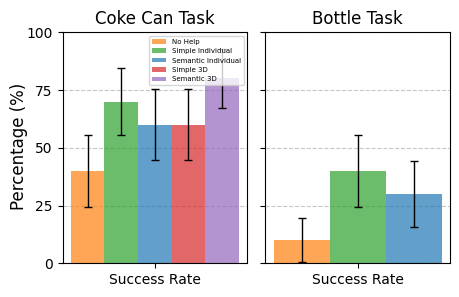

In [300]:
    
# Example usage:
plot_success_failure_percentages(
    data_lift_the_coke_can, 
    data_lift_the_bottle, 
    "Task Comparison: Success vs Failures"
)

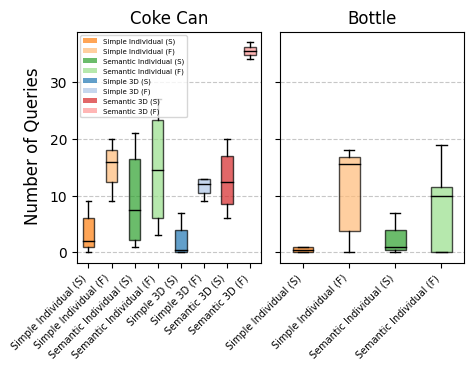

In [ ]:


plot_success_queries_comparison(
    data_lift_the_coke_can,
    data_lift_the_bottle,
    "Task Comparison: Success Steps"    
)

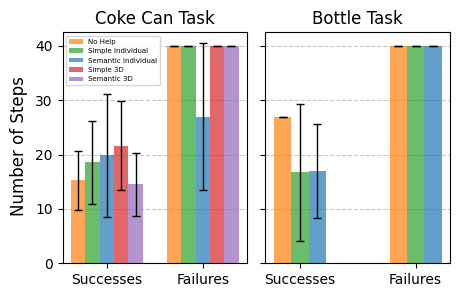

In [302]:
plot_average_steps(
    data_lift_the_coke_can,
    data_lift_the_bottle,
    "Task Comparison: Average Steps"
)

In [304]:
def compare_no_help_vs_others(data):
    """
    Performs Fisher's exact test comparing no_help success rate vs combined success rate of other methods.
    Returns test statistics and descriptive statistics.
    """
    from scipy import stats
    
    # Get no_help condition successes and failures
    no_help_data = data["conditions"]["no_help"]
    no_help_successes = sum(1 for entry in no_help_data if entry["success"] == 1)
    no_help_failures = sum(1 for entry in no_help_data if entry["success"] == 0)
    no_help_success_rate = no_help_successes / len(no_help_data)
    
    # Get other conditions combined successes and failures
    other_conditions = [cond for cond in data["conditions"].keys() if cond != "no_help"]
    other_successes = 0
    other_failures = 0
    other_success_rates = []
    
    for condition in other_conditions:
        condition_data = data["conditions"][condition]
        condition_successes = sum(1 for entry in condition_data if entry["success"] == 1)
        condition_failures = sum(1 for entry in condition_data if entry["success"] == 0)
        other_successes += condition_successes
        other_failures += condition_failures
        other_success_rates.append(condition_successes / len(condition_data))
    
    other_total = sum(len(data["conditions"][cond]) for cond in other_conditions)
    other_mean_success_rate = other_successes / other_total
    
    # Create contingency table
    contingency_table = [[no_help_successes, other_successes],
                        [no_help_failures, other_failures]]
    
    # Perform Fisher's exact test
    odds_ratio, p_value = stats.fisher_exact(contingency_table)
    
    return {
        'no_help_success_rate': no_help_success_rate,
        'other_methods_mean_success_rate': other_mean_success_rate,
        'other_methods_individual_rates': other_success_rates,
        'no_help_counts': (no_help_successes, no_help_failures),
        'other_counts': (other_successes, other_failures),
        'odds_ratio': odds_ratio,
        'p_value': p_value
    }

# Analyze both tasks
print("Coke Can Task Analysis:")
coke_results = compare_no_help_vs_others(data_lift_the_coke_can)
print(f"No Help Success Rate: {coke_results['no_help_success_rate']:.2%} ({coke_results['no_help_counts'][0]} successes, {coke_results['no_help_counts'][1]} failures)")
print(f"Other Methods Mean Success Rate: {coke_results['other_methods_mean_success_rate']:.2%} ({coke_results['other_counts'][0]} successes, {coke_results['other_counts'][1]} failures)")
print(f"Other Methods Individual Rates: {[f'{rate:.2%}' for rate in coke_results['other_methods_individual_rates']]}")
print(f"Odds Ratio: {coke_results['odds_ratio']:.4f}")
print(f"P-value: {coke_results['p_value']:.4f}")

print("\nBottle Task Analysis:")
bottle_results = compare_no_help_vs_others(data_lift_the_bottle)
print(f"No Help Success Rate: {bottle_results['no_help_success_rate']:.2%} ({bottle_results['no_help_counts'][0]} successes, {bottle_results['no_help_counts'][1]} failures)")
print(f"Other Methods Mean Success Rate: {bottle_results['other_methods_mean_success_rate']:.2%} ({bottle_results['other_counts'][0]} successes, {bottle_results['other_counts'][1]} failures)")
print(f"Other Methods Individual Rates: {[f'{rate:.2%}' for rate in bottle_results['other_methods_individual_rates']]}")
print(f"Odds Ratio: {bottle_results['odds_ratio']:.4f}")
print(f"P-value: {bottle_results['p_value']:.4f}")

Coke Can Task Analysis:
No Help Success Rate: 40.00% (4 successes, 6 failures)
Other Methods Mean Success Rate: 67.50% (27 successes, 13 failures)
Other Methods Individual Rates: ['70.00%', '60.00%', '60.00%', '80.00%']
Odds Ratio: 0.3210
P-value: 0.1505

Bottle Task Analysis:
No Help Success Rate: 10.00% (1 successes, 9 failures)
Other Methods Mean Success Rate: 35.00% (7 successes, 13 failures)
Other Methods Individual Rates: ['40.00%', '30.00%']
Odds Ratio: 0.2063
P-value: 0.2103


In [305]:
def compare_success_steps(data):
    """
    Performs Mann-Whitney U test comparing steps in successful attempts between
    no_help and other conditions.
    """
    from scipy import stats
    import numpy as np
    
    # Get no_help successful steps
    no_help_data = data["conditions"]["no_help"]
    no_help_success_steps = [entry["steps"] for entry in no_help_data if entry["success"] == 1]
    
    # Get other conditions successful steps
    other_conditions = [cond for cond in data["conditions"].keys() if cond != "no_help"]
    other_success_steps = []
    
    for condition in other_conditions:
        condition_data = data["conditions"][condition]
        success_steps = [entry["steps"] for entry in condition_data if entry["success"] == 1]
        other_success_steps.extend(success_steps)
    
    # Perform Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(no_help_success_steps, 
                                          other_success_steps,
                                          alternative='two-sided')
    
    return {
        'no_help_mean_steps': np.mean(no_help_success_steps),
        'no_help_std_steps': np.std(no_help_success_steps),
        'no_help_n': len(no_help_success_steps),
        'other_mean_steps': np.mean(other_success_steps),
        'other_std_steps': np.std(other_success_steps),
        'other_n': len(other_success_steps),
        'statistic': statistic,
        'p_value': p_value
    }

# Analyze both tasks
print("Coke Can Task - Success Steps Analysis:")
coke_steps = compare_success_steps(data_lift_the_coke_can)
print(f"No Help: Mean={coke_steps['no_help_mean_steps']:.2f} ± {coke_steps['no_help_std_steps']:.2f} steps (n={coke_steps['no_help_n']})")
print(f"Other Methods: Mean={coke_steps['other_mean_steps']:.2f} ± {coke_steps['other_std_steps']:.2f} steps (n={coke_steps['other_n']})")
print(f"Mann-Whitney U statistic: {coke_steps['statistic']:.4f}")
print(f"P-value: {coke_steps['p_value']:.4f}")

print("\nBottle Task - Success Steps Analysis:")
bottle_steps = compare_success_steps(data_lift_the_bottle)
print(f"No Help: Mean={bottle_steps['no_help_mean_steps']:.2f} ± {bottle_steps['no_help_std_steps']:.2f} steps (n={bottle_steps['no_help_n']})")
print(f"Other Methods: Mean={bottle_steps['other_mean_steps']:.2f} ± {bottle_steps['other_std_steps']:.2f} steps (n={bottle_steps['other_n']})")
print(f"Mann-Whitney U statistic: {bottle_steps['statistic']:.4f}")
print(f"P-value: {bottle_steps['p_value']:.4f}")

Coke Can Task - Success Steps Analysis:
No Help: Mean=15.25 ± 5.49 steps (n=4)
Other Methods: Mean=18.33 ± 8.72 steps (n=27)
Mann-Whitney U statistic: 46.5000
P-value: 0.6790

Bottle Task - Success Steps Analysis:
No Help: Mean=27.00 ± 0.00 steps (n=1)
Other Methods: Mean=16.86 ± 11.08 steps (n=7)
Mann-Whitney U statistic: 5.0000
P-value: 0.6606


In [307]:
def compare_success_vs_failure_queries(data_coke, data_bottle):
    """
    For each method in each task, compares number of queries during success vs failure
    """
    from scipy import stats
    import numpy as np
    
    conditions = ['simple_individual', 'semantic_individual', 'simple_3d', 'semantic_3d']
    tasks = {'Coke': data_coke, 'Bottle': data_bottle}
    
    for condition in conditions:
        print(f"\n{condition.replace('_', ' ').title()}:")
        
        for task_name, data in tasks.items():
            if condition in data["conditions"]:
                condition_data = data["conditions"][condition]
                success_queries = [entry["num_queries"] for entry in condition_data 
                                 if entry["success"] == 1 and entry["num_queries"] is not None]
                failure_queries = [entry["num_queries"] for entry in condition_data 
                                 if entry["success"] == 0 and entry["num_queries"] is not None]
                
                if success_queries and failure_queries:
                    statistic, p_value = stats.mannwhitneyu(success_queries, failure_queries, 
                                                          alternative='two-sided')
                    
                    print(f"\n{task_name} Task:")
                    print(f"Success: Mean={np.mean(success_queries):.2f} ± {np.std(success_queries):.2f} queries (n={len(success_queries)})")
                    print(f"Failure: Mean={np.mean(failure_queries):.2f} ± {np.std(failure_queries):.2f} queries (n={len(failure_queries)})")
                    print(f"Mann-Whitney U test: U={statistic:.4f}, p={p_value:.4f}")

def compare_success_queries_between_tasks(data_coke, data_bottle):
    """
    For each method, compares success queries between tasks
    """
    from scipy import stats
    import numpy as np
    
    conditions = ['simple_individual', 'semantic_individual', 'simple_3d', 'semantic_3d']
    
    print("\nComparing Success Queries Between Tasks:")
    
    for condition in conditions:
        print(f"\n{condition.replace('_', ' ').title()}:")
        
        if condition in data_coke["conditions"] and condition in data_bottle["conditions"]:
            coke_queries = [entry["num_queries"] for entry in data_coke["conditions"][condition]
                          if entry["success"] == 1 and entry["num_queries"] is not None]
            bottle_queries = [entry["num_queries"] for entry in data_bottle["conditions"][condition]
                            if entry["success"] == 1 and entry["num_queries"] is not None]
            
            if coke_queries and bottle_queries:
                statistic, p_value = stats.mannwhitneyu(coke_queries, bottle_queries, 
                                                      alternative='two-sided')
                
                print(f"Coke Task: Mean={np.mean(coke_queries):.2f} ± {np.std(coke_queries):.2f} queries (n={len(coke_queries)})")
                print(f"Bottle Task: Mean={np.mean(bottle_queries):.2f} ± {np.std(bottle_queries):.2f} queries (n={len(bottle_queries)})")
                print(f"Mann-Whitney U test: U={statistic:.4f}, p={p_value:.4f}")

def compare_failure_queries_between_tasks(data_coke, data_bottle):
    """
    For each method, compares failure queries between tasks
    """
    from scipy import stats
    import numpy as np
    
    conditions = ['simple_individual', 'semantic_individual', 'simple_3d', 'semantic_3d']
    
    print("\nComparing Failure Queries Between Tasks:")
    
    for condition in conditions:
        print(f"\n{condition.replace('_', ' ').title()}:")
        
        if condition in data_coke["conditions"] and condition in data_bottle["conditions"]:
            coke_queries = [entry["num_queries"] for entry in data_coke["conditions"][condition]
                          if entry["success"] == 0 and entry["num_queries"] is not None]
            bottle_queries = [entry["num_queries"] for entry in data_bottle["conditions"][condition]
                            if entry["success"] == 0 and entry["num_queries"] is not None]
            
            if coke_queries and bottle_queries:
                statistic, p_value = stats.mannwhitneyu(coke_queries, bottle_queries, 
                                                      alternative='two-sided')
                
                print(f"Coke Task: Mean={np.mean(coke_queries):.2f} ± {np.std(coke_queries):.2f} queries (n={len(coke_queries)})")
                print(f"Bottle Task: Mean={np.mean(bottle_queries):.2f} ± {np.std(bottle_queries):.2f} queries (n={len(bottle_queries)})")
                print(f"Mann-Whitney U test: U={statistic:.4f}, p={p_value:.4f}")

# Run all analyses
print("1. Comparing success vs failure queries within each method and task:")
compare_success_vs_failure_queries(data_lift_the_coke_can, data_lift_the_bottle)

print("\n2. Comparing success queries between tasks for each method:")
compare_success_queries_between_tasks(data_lift_the_coke_can, data_lift_the_bottle)

print("\n3. Comparing failure queries between tasks for each method:")
compare_failure_queries_between_tasks(data_lift_the_coke_can, data_lift_the_bottle)

1. Comparing success vs failure queries within each method and task:

Simple Individual:

Coke Task:
Success: Mean=3.57 ± 3.20 queries (n=7)
Failure: Mean=15.00 ± 4.55 queries (n=3)
Mann-Whitney U test: U=0.5000, p=0.0294

Bottle Task:
Success: Mean=0.50 ± 0.50 queries (n=4)
Failure: Mean=11.00 ± 7.83 queries (n=6)
Mann-Whitney U test: U=6.0000, p=0.2248

Semantic Individual:

Coke Task:
Success: Mean=9.50 ± 7.97 queries (n=6)
Failure: Mean=14.75 ± 10.01 queries (n=4)
Mann-Whitney U test: U=6.5000, p=0.2850

Bottle Task:
Success: Mean=2.67 ± 3.09 queries (n=3)
Failure: Mean=7.43 ± 7.01 queries (n=7)
Mann-Whitney U test: U=7.5000, p=0.5553

Simple 3D:

Coke Task:
Success: Mean=2.17 ± 2.79 queries (n=6)
Failure: Mean=11.50 ± 1.66 queries (n=4)
Mann-Whitney U test: U=0.0000, p=0.0128

Semantic 3D:

Coke Task:
Success: Mean=12.62 ± 5.07 queries (n=8)
Failure: Mean=35.50 ± 1.50 queries (n=2)
Mann-Whitney U test: U=0.0000, p=0.0488

2. Comparing success queries between tasks for each method: